In [1]:
from numpy import ndarray
from polars import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from data_loader import load_data
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [2]:
load_data("shivachandel/kc-house-data", "../Data")
df = pl.read_csv("../Data/kc_house_data.csv", try_parse_dates=True)

Dataset URL: https://www.kaggle.com/datasets/shivachandel/kc-house-data


## Data exploration

In [3]:
df.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
i64,str,f64,i64,f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64
7129300520,"""20141013T000000""",221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,"""20141209T000000""",538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
5631500400,"""20150225T000000""",180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,"""20141209T000000""",604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,"""20150218T000000""",510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

statistic,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",21613.0,"""21613""",21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21611.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",4.5803e9,null,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.40943,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
"""std""",2.8766e9,null,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.67924,53.505026,0.138564,0.140828,685.391304,27304.179631
"""min""",1.000102e6,"""20140502T000000""",75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0
"""25%""",2.1230e9,null,321950.0,3.0,1.75,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.471,-122.328,1490.0,5100.0
"""50%""",3.9049e9,null,450000.0,3.0,2.25,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.5718,-122.23,1840.0,7620.0
"""75%""",7.3089e9,null,645000.0,4.0,2.5,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.678,-122.125,2360.0,10083.0
"""max""",9.9000e9,"""20150527T000000""",7.7e6,33.0,8.0,13540.0,1.651359e6,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0


In [5]:
df = df.with_columns(pl.col("date").str.strptime(pl.Date, "%Y%m%dT%H%M%S"))
df = df.with_columns(pl.col("sqft_above").fill_null(strategy="mean"))

In [6]:
df.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
i64,date,f64,i64,f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64
7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df = df.drop(["id"])
df.describe()

statistic,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""21613""",21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""","""2014-10-29 04:38:01.959000""",540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.40943,7.656873,1788.396058,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
"""std""",null,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.67924,53.505026,0.138564,0.140828,685.391304,27304.179631
"""min""","""2014-05-02""",75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0
"""25%""","""2014-07-22""",321950.0,3.0,1.75,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.471,-122.328,1490.0,5100.0
"""50%""","""2014-10-16""",450000.0,3.0,2.25,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.5718,-122.23,1840.0,7620.0
"""75%""","""2015-02-17""",645000.0,4.0,2.5,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.678,-122.125,2360.0,10083.0
"""max""","""2015-05-27""",7.7e6,33.0,8.0,13540.0,1.651359e6,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0


In [8]:
df.null_count()

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df = df.with_columns(
    pl.col("date").dt.year().alias("year_sold")
)

In [10]:
df = df.with_columns(
    pl.when(pl.col("year_sold") - pl.col("yr_built") > 0)
    .then(pl.col("year_sold") - pl.col("yr_built"))
    .otherwise(0)
    .alias("age")
)

In [11]:
df = df.with_columns(
    pl.when(pl.col("yr_renovated") > 0)
    .then(1)
    .otherwise(0)
    .alias("renovated")
)

In [48]:
zipcode_median = df.group_by("zipcode").agg(pl.col("price").median().alias("zipcode_group"))
zipcode_median

zipcode,zipcode_group
i64,f64
98188,264000.0
98075,739999.0
98072,515000.0
98108,342500.0
98007,555000.0
…,…
98027,570500.0
98003,267475.0
98045,399500.0


In [ ]:
df = df.join(zipcode_median, on="zipcode", how="left")

<Axes: xlabel='lat', ylabel='long'>

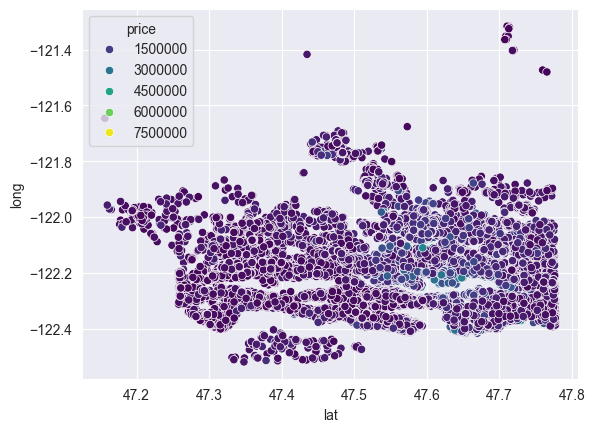

In [13]:
sns.scatterplot(data=df.to_pandas(), x="lat", y="long", hue="price", palette="viridis", alpha=1)

<Axes: xlabel='lat', ylabel='long'>

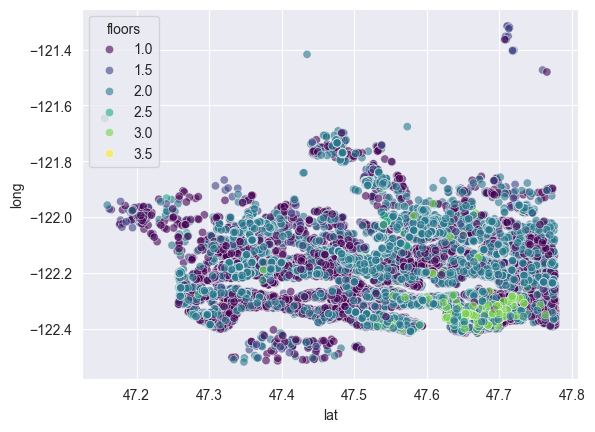

In [14]:
sns.scatterplot(data=df.to_pandas(), x="lat", y="long", hue="floors", palette="viridis", alpha=0.6)

<Axes: xlabel='lat', ylabel='long'>

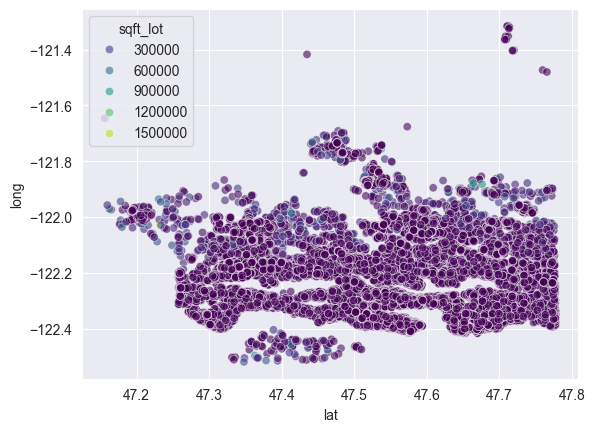

In [15]:
sns.scatterplot(data=df.to_pandas(), x="lat", y="long", hue="sqft_lot", palette="viridis", alpha=0.6)

In [16]:
df = df.with_columns(pl.Series(name="lat_long", values=KMeans(n_clusters=5).fit_predict(
    df[["lat", "long", "bedrooms", "bathrooms"]].to_numpy())))

<Axes: xlabel='lat', ylabel='long'>

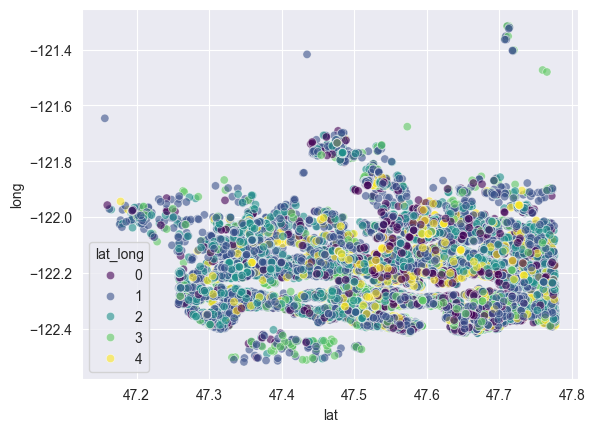

In [17]:
sns.scatterplot(data=df.to_pandas(), x="lat", y="long", hue="lat_long", palette="viridis", alpha=0.6)

In [18]:
df.head()

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age,renovated,zipcode_group,lat_long
date,f64,i64,f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i32,i64,i32,f64,i32
2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,0,278277.0,1
2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,63,1,425000.0,1
2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,0,445000.0,3
2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,0,489950.0,0
2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,0,642000.0,1


<Axes: >

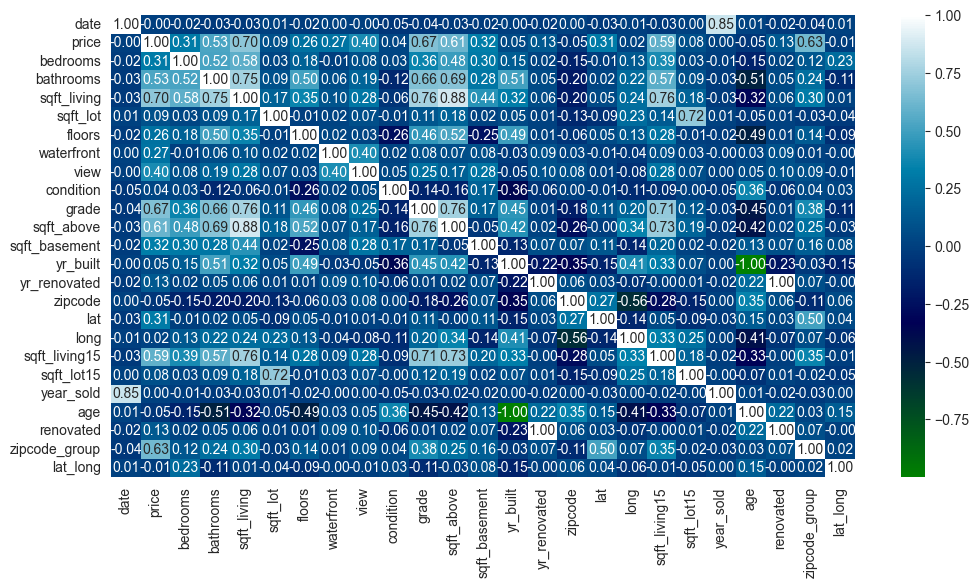

In [19]:
plt.figure(figsize=(12, 6))
correlation: DataFrame = df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap="ocean", annot=True,
            fmt=".2f")

<Axes: >

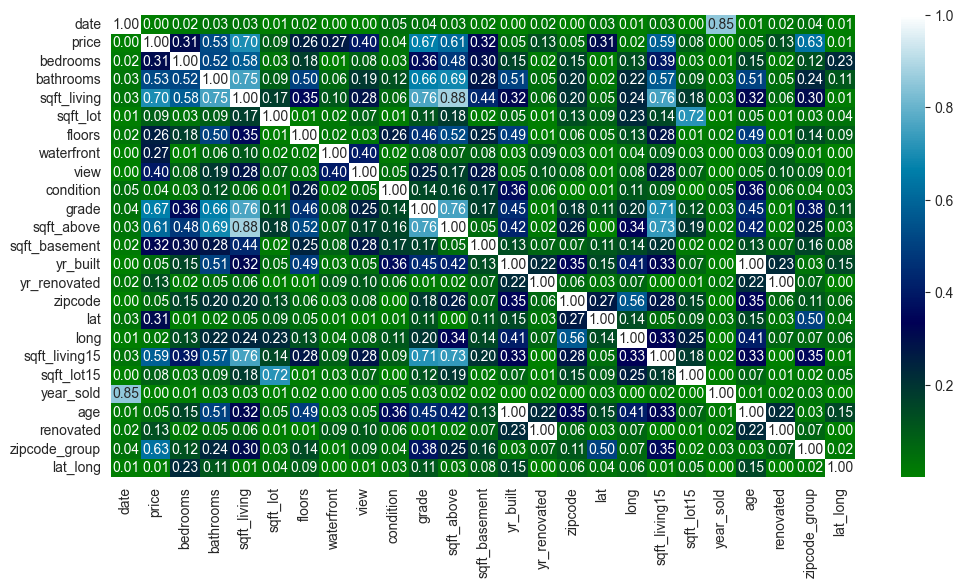

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(abs(correlation.to_numpy()),
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap="ocean",
            annot=True,
            fmt=".2f")

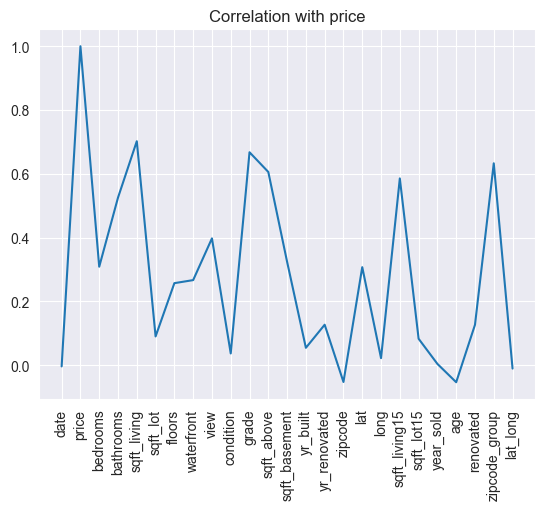

In [21]:
sns.lineplot(correlation["price"])
plt.xticks(ticks=range(len(correlation)), labels=correlation.columns, rotation=90)
plt.title("Correlation with price")
plt.show()

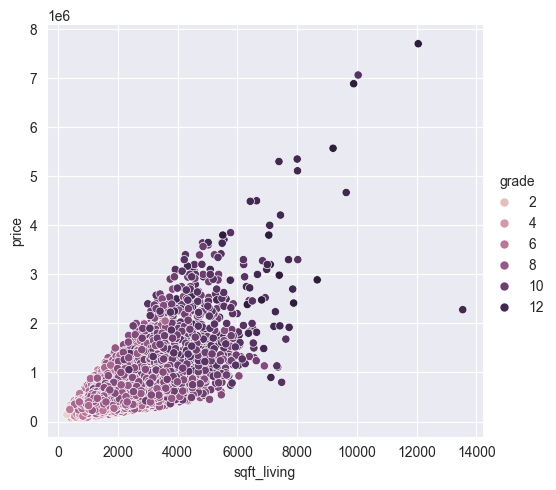

In [22]:
sns.relplot(df, x="sqft_living", y="price", hue="grade")

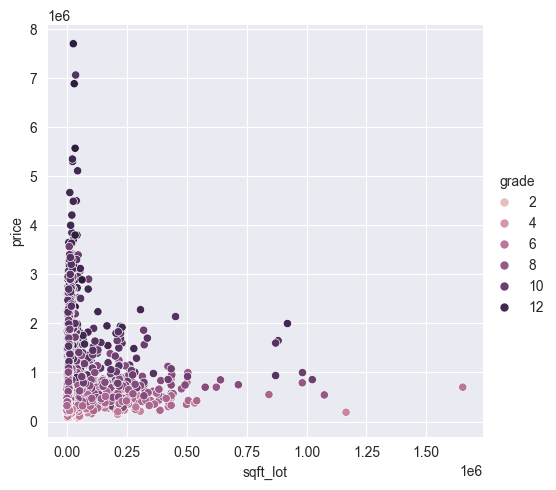

In [23]:
sns.relplot(df, x="sqft_lot", y="price", hue="grade")

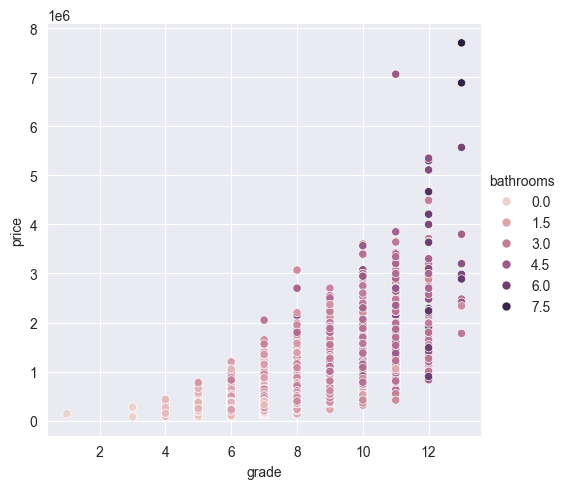

In [24]:
sns.relplot(df, x="grade", y="price", hue="bathrooms")

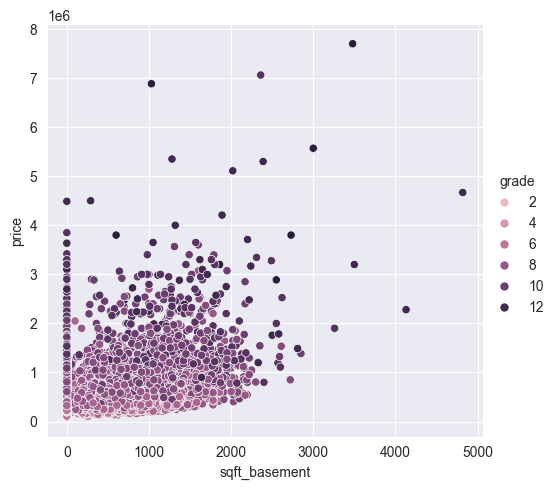

In [25]:
sns.relplot(df, x="sqft_basement", y="price", hue="grade")

In [26]:
# Find the row corresponding to 'price'
price_corr = correlation["price"]
mask = abs(price_corr) > 0.2
columns = [correlation.columns[i] for i, m in enumerate(mask) if m]
columns.remove("price")
columns.remove("lat")
columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'zipcode_group']

In [27]:
type(df.columns)
a:list = [1,2,3,4,5]
a.index(3)

2

In [29]:
column_types = df.dtypes
print(type(column_types))
column_types_set = set(column_types)
for col in column_types_set:
    print(col)
    col_types = [df.columns[i] for i, c in enumerate(column_types) if c == col]
    print(col_types)
    print("--")
print(len(column_types))

<class 'list'>
Int64
['bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'age']
--
Date
['date']
--
Float64
['price', 'bathrooms', 'floors', 'lat', 'long', 'zipcode_group']
--
Int32
['year_sold', 'renovated', 'lat_long']
--
25


In [32]:
columns_grouped_by_type = {}
for col in columns:
    col_type = column_types[df.columns.index(col)]
    if col_type not in columns_grouped_by_type:
        columns_grouped_by_type[col_type] = []
    columns_grouped_by_type[col_type].append(col)
print(columns_grouped_by_type)

{Int64: ['bedrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15'], Float64: ['bathrooms', 'floors', 'zipcode_group']}


## Outlier detection

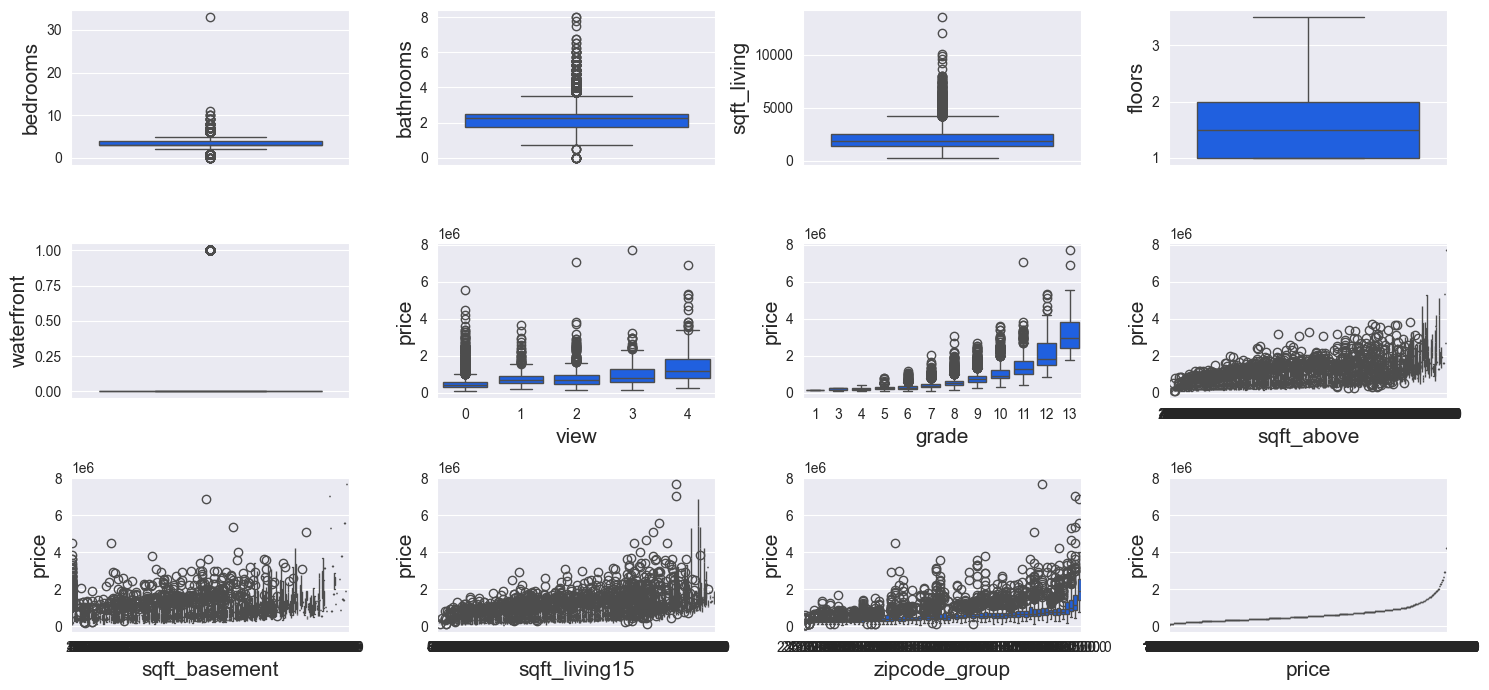

In [43]:
import numpy as np

# Convert Polars DataFrame to Pandas DataFrame
df_pandas = df[columns + ["price"]].to_pandas()

# Set style and custom palette
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']

sns.set_palette(sns.color_palette(colors))

# Order columns: numerical first, then categorical
OrderedCols = np.concatenate([
    df_pandas.select_dtypes(exclude='object').columns.values,
    df_pandas.select_dtypes(include='object').columns.values
])

# Create subplots
fig, ax = plt.subplots(3, 4, figsize=(15, 7), dpi=100)

# Iterate over columns
for i, col in enumerate(OrderedCols):
    x = i // 4
    y = i % 4
    if i < 5:  # Numerical columns
        sns.boxplot(data=df_pandas, y=col, ax=ax[x, y])
        ax[x, y].yaxis.label.set_size(15)
    else:  # Categorical columns
        sns.boxplot(data=df_pandas, x=col, y='price', ax=ax[x, y])
        ax[x, y].xaxis.label.set_size(15)
        ax[x, y].yaxis.label.set_size(15)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

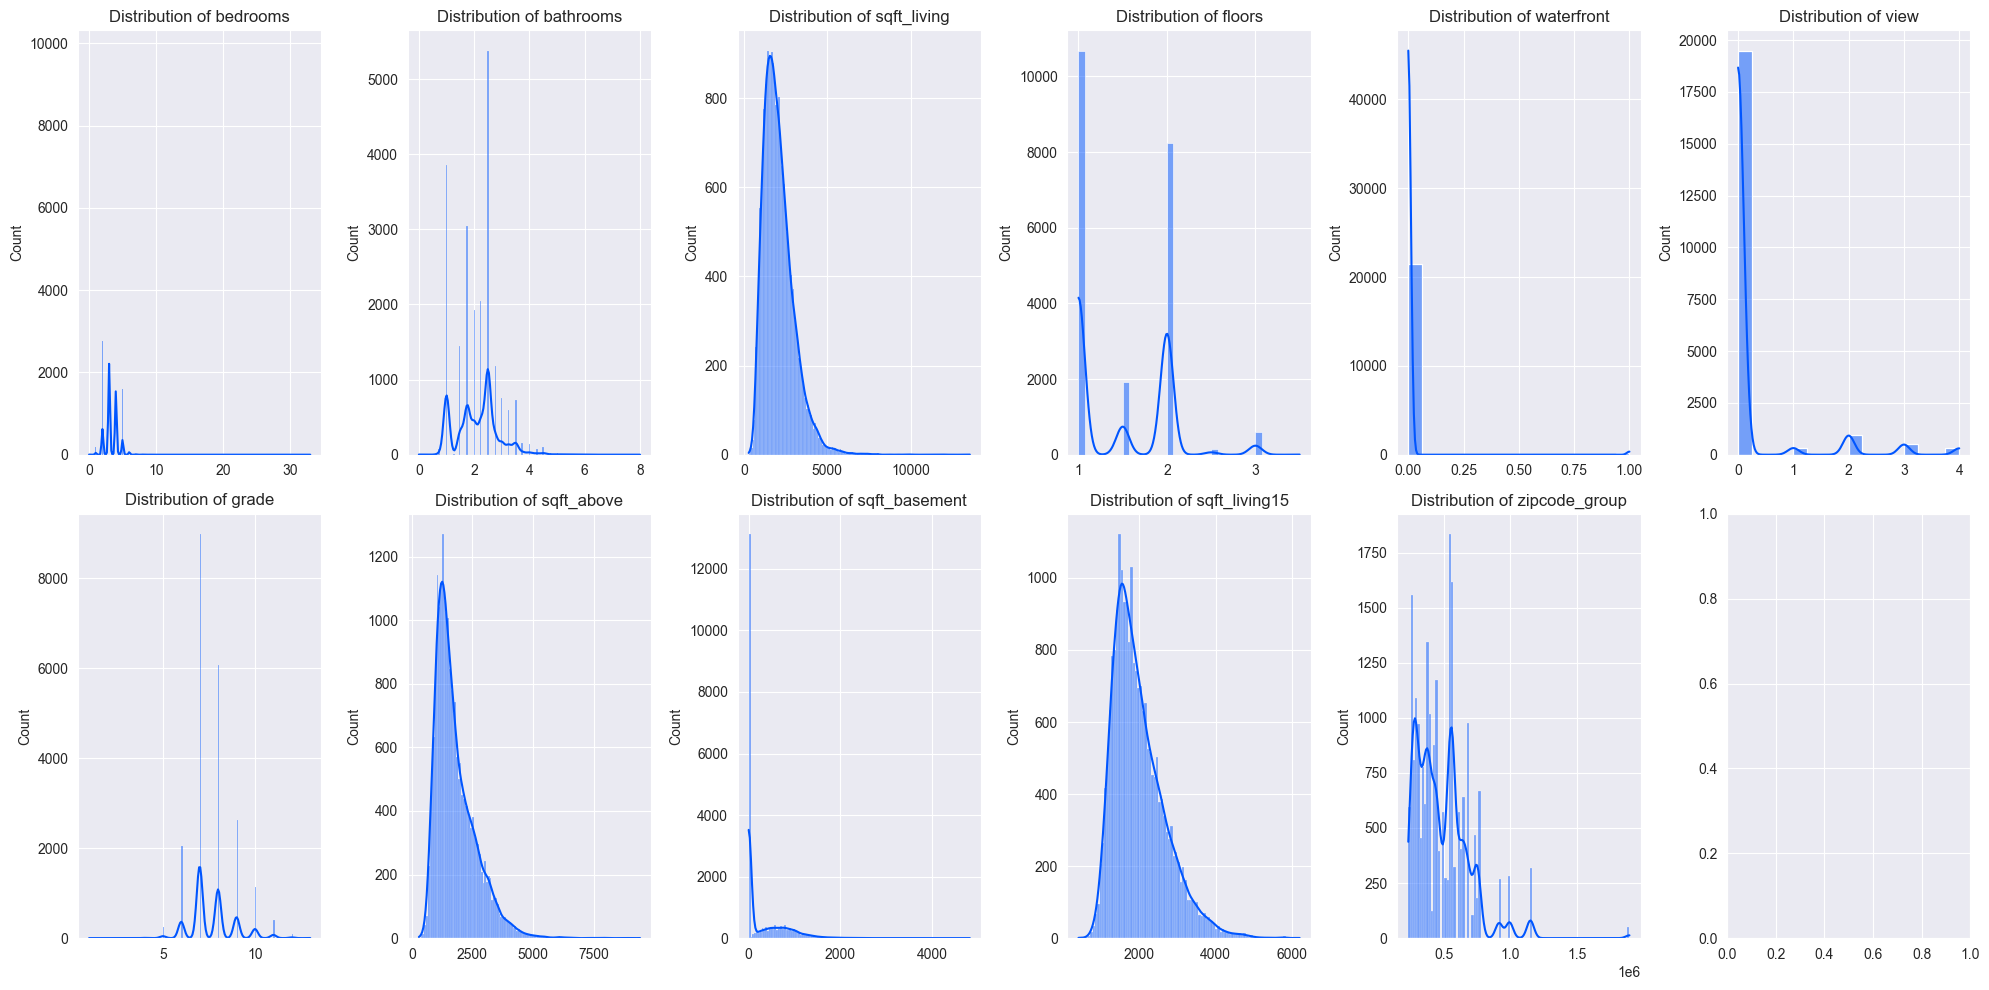

In [51]:
fig, axs = plt.subplots(2, 6, figsize=(20, 10))
for i, column in enumerate(columns):
    row = int(i/6)
    col = i % 6
    sns.histplot(df[column], ax=axs[row, col], kde=True)
    axs[row, col].set_title(f"Distribution of {column}")
plt.tight_layout()

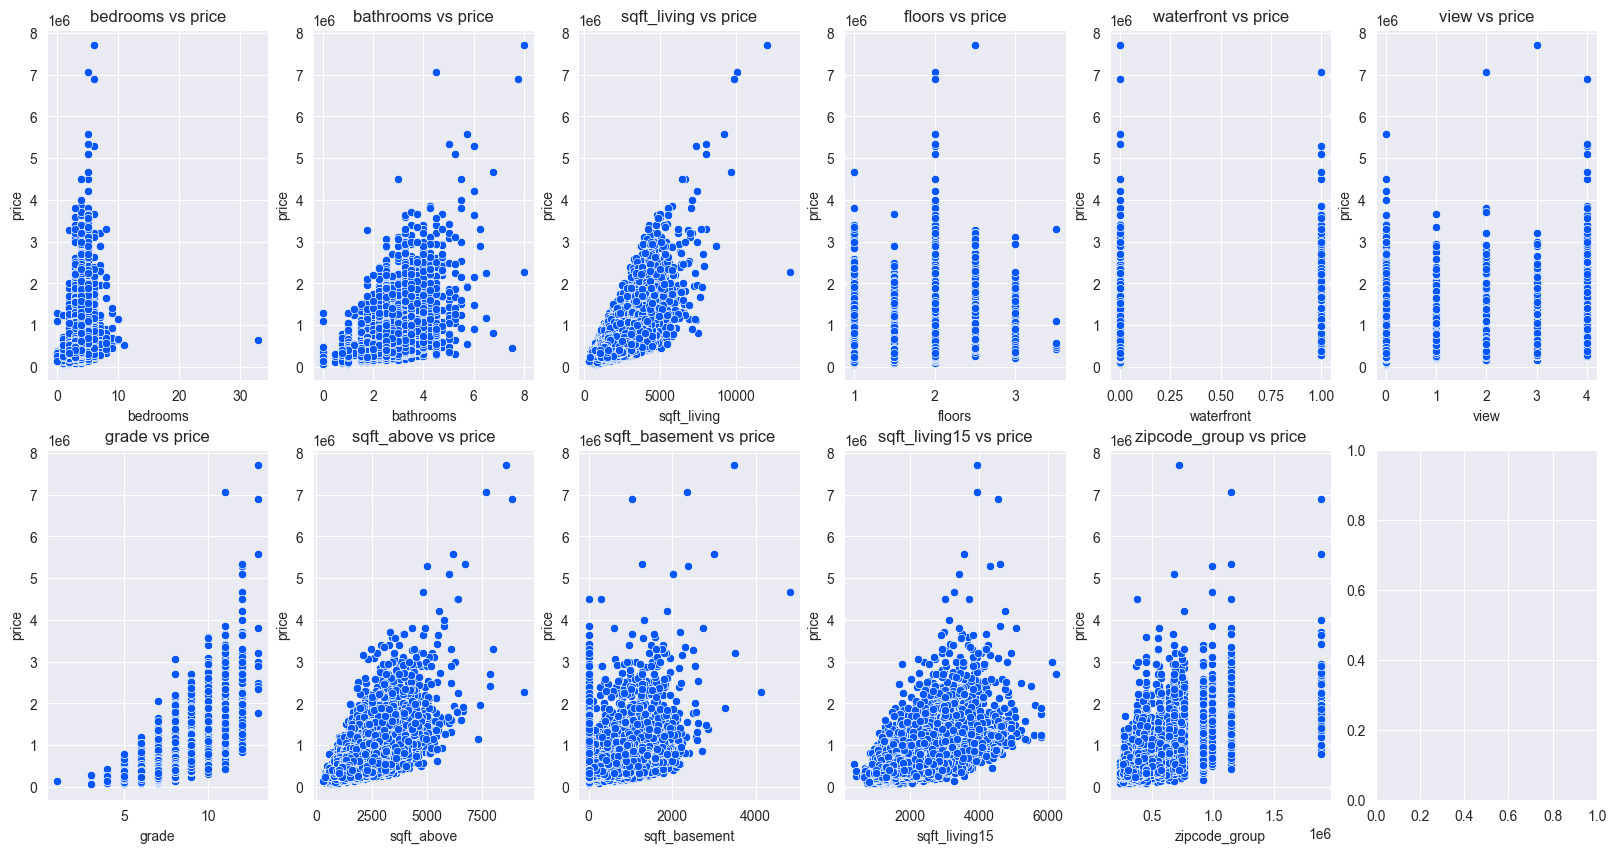

In [58]:
fig, axs = plt.subplots(2, 6, figsize=(20, 10))
for i, column in enumerate(columns):
    row = int(i/6)
    col = i % 6
    sns.scatterplot(df, x=column, y="price", ax=axs[row, col])
    axs[row, col].set_title(f"{column} vs price")

## Prepare data

In [ ]:
X = df[columns].to_numpy()
y = df["price"].to_numpy().reshape(-1, 1)

In [ ]:
X.shape, y.shape

## Split train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Train the model

In [ ]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [ ]:
model.coef_, model.intercept_

## Evaluate the model

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

## Visualize your result

In [ ]:
plt.scatter(y_pred, y_test)
plt.xlabel('y-pred')
plt.ylabel('y-actual')